In [2]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

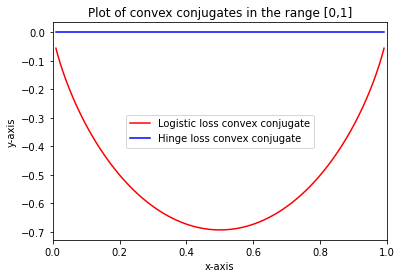

In [2]:
## Q2 part 3 - Plotting the convex conjugate of the logistic and hinge loss function ## 

x_values = np.linspace(0.01,0.99,1000)

y_values_1 = x_values*np.log(x_values/(1-x_values))-np.log(1+x_values/(1-x_values))
y_values_2 = 0*x_values


plt.plot(x_values, y_values_1, label='Logistic loss convex conjugate',color='red')
plt.plot(x_values, y_values_2, label='Hinge loss convex conjugate',color='blue')


plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot of convex conjugates in the range [0,1]')

plt.legend()
plt.xlim(0,1)
plt.show

In [9]:
## Q2 part 4 - SVM and Logistic Regression ##

def error_calc(alpha,n,d,beta):
    theta0=np.ones(d)
    
    # Initialize variables for averaging
    average_square_errors_svm = 0
    average_square_errors_lr = 0
    
    # Write a code that generates a synthetic dataset X,Y
    # X has n rows (number of data points) and d columns (number of features)
    # and Y is a 1-d array with n elements each being -1 or 1
    # each element of X is standard Gaussian
    # for the i element of Y is randomly generated by the
    # description in the pdf file and parameter alpha
    X = np.random.randn(n,d)
    odds = np.exp(beta*np.dot(X,theta0))
    Y = np.random.choice([-1, 1], size=1, p=[1 / (1 + odds[0]), odds[0] / (1 + odds[0])])
    for i in range(n-1):
        Y = np.concatenate((Y,np.random.choice([-1, 1], size=1, p=[1 / (1 + odds[i]), odds[i] / (1 + odds[i])])))
   

    # run svm.SVC with parameters (C=1/alpha,kernel='linear')
    # also run Logisticregression with parameter (C=1/alpha)
    
    svm_model = svm.SVC(C=1/alpha,kernel='linear')
    lr_model = LogisticRegression(C=1/alpha)
    # See: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    # See: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    svm_model.fit(X, Y)
    lr_model.fit(X, Y)
    
    # read out the coefficients of the trained models
    # calculate SQUARE L2 norm of the error between the coefficients of each model
    # and theta0, call the error_LR and error_SVM
    error_SVM = mean_squared_error(svm_model.coef_, theta0.reshape(1, -1))
    error_LR = mean_squared_error(lr_model.coef_, theta0.reshape(1, -1))

    return error_LR, error_SVM

In [10]:
def avg_risk_calc(reg,n,d,alpha,beta):
    n_iterations = 1000
    
    square_errors_svm = 0 
    square_errors_lr = 0 
    # write a for loop that calculates the error for 1000 times
    # Although the parametrs reg, n,d,alpha are the same, each error is random
    # because the dataset is generated again
    # Calculate the average errors of 1000 runs 
    # You get MSE_LR and MSE_SVM
    for i in range(n_iterations):
        square_error_lr,square_error_svm = error_calc(alpha,n,d,beta)
        square_errors_lr += square_error_lr
        square_errors_svm += square_error_svm
        
    MSE_LR = square_errors_lr/n_iterations
    MSE_SVM = square_errors_svm/n_iterations
    
    return MSE_LR, MSE_SVM

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done
Iteration 6 done
Iteration 7 done
Iteration 8 done
Iteration 9 done
Iteration 10 done
Iteration 11 done
Iteration 12 done
Iteration 13 done
Iteration 14 done
Iteration 15 done
Iteration 16 done
Iteration 17 done
Iteration 18 done
Iteration 19 done
Iteration 20 done


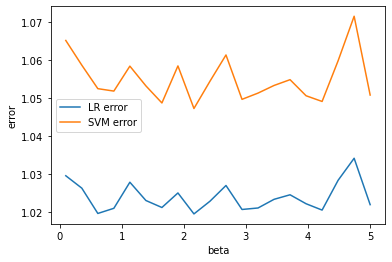

In [13]:
# Now using avg_risk_calc function plot the risk function of alpha
# for different values n,d, reg 
d = 10
n = 100
beta = np.linspace(0.1,5,20)
alpha = 10
LR_errors = []
SVM_errors = []
for i in range(len(beta)):
    MSE_LR, MSE_SVM = avg_risk_calc(1,n,d,alpha,beta[i])
    LR_errors.append(MSE_LR)
    SVM_errors.append(MSE_SVM)
    print(f"Iteration {i+1} done, beta = {beta[i]}")

# Plot the result
plt.plot(beta, LR_errors, label="LR error")
plt.plot(beta, SVM_errors, label="SVM error")
plt.xlabel("beta")
plt.ylabel("error")
plt.legend()
plt.show()

#### Discuss what the effect of n, d, α on the risk curves are and discuss why.

**n** is the number of samples and as the number of samples increase, the risk tends to decrease. This is because with more samples used to train the models, the more accurate the predictions become which leads to a decrease in risk. 

**d** is the dimension of the data. An increase to the dimension can lead to an increase in risk. This is due to in high-dimensional spaces, data can become sparse and models can overfit to the training data, leading to poor generalization performance. However, if the data has a good structure, only higher dimensional data can capture this structure and then an increase in d can lead to a decrease in risk. 

**α** is the regularization parameter. This term helps prevent overfitting by penalizing large coefficients. For a low value of α the optimizer will favor simpler models even if it leads to higher training errors. With a large α, the optimizer will try to fit the data more closely which can lead to overfitting.

#### Discuss which of the two methods lead to a lower risk curve and why.

According to the result showed in the graph, logistic regression lead to a lower risk curve while support vector machine leads to a higher risk curve. 


[1562.9291485  1566.02050686] [0.87721767 0.87732378]


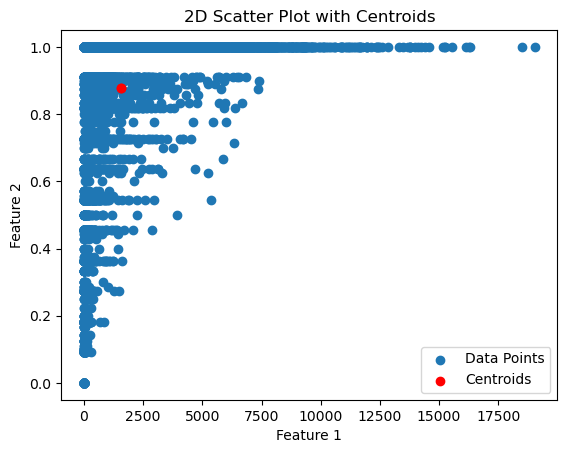

[1577.21979722 1560.07078473 1556.13382962] [0.87770682 0.87712069 0.87698466]


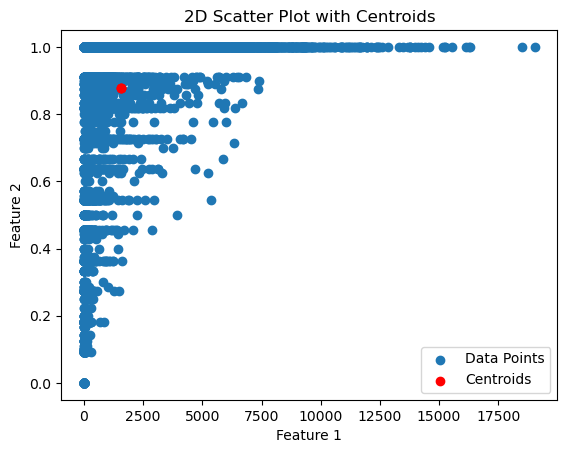

[1564.96518747 1558.13824457 1562.82082906 1571.97504118] [0.87728799 0.87705296 0.87721435 0.8775276 ]


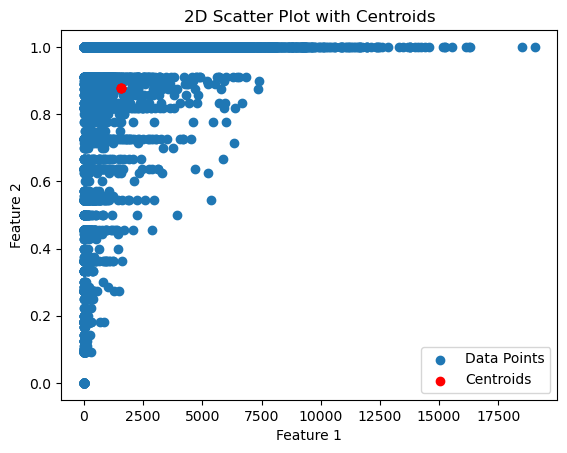

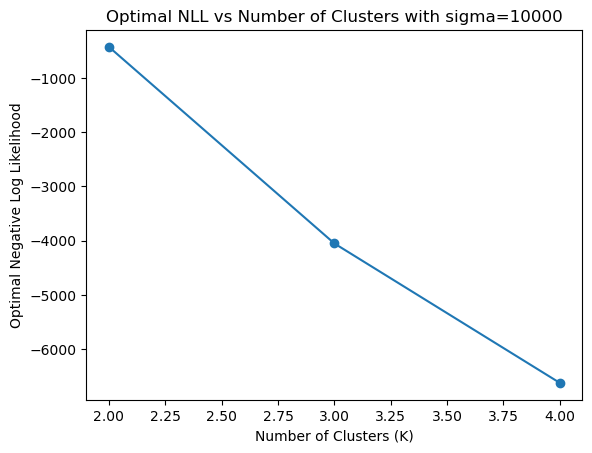

[1564.47482768 1564.47482768] [0.87727073 0.87727073]


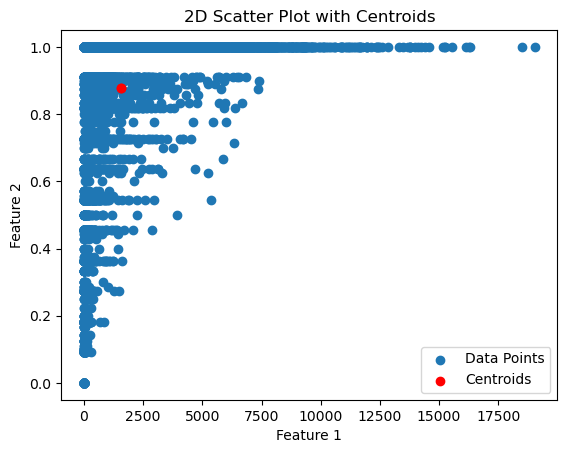

[1564.47482768 1564.47482768 1564.47482768] [0.87727073 0.87727073 0.87727073]


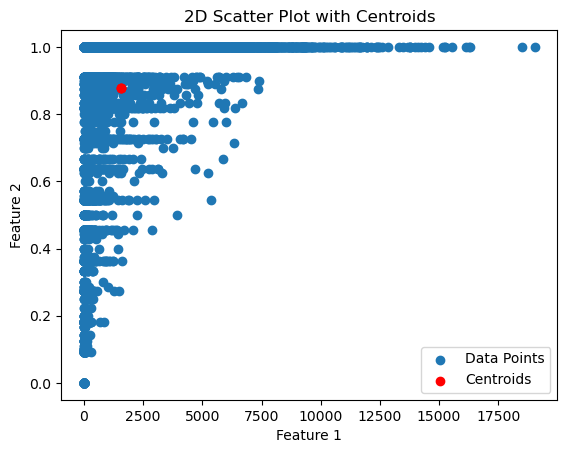

[1564.47482768 1564.47482768 1564.47482768 1564.47482768] [0.87727073 0.87727073 0.87727073 0.87727073]


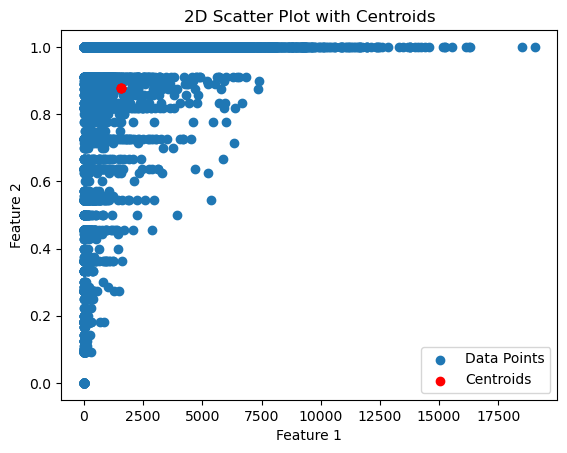

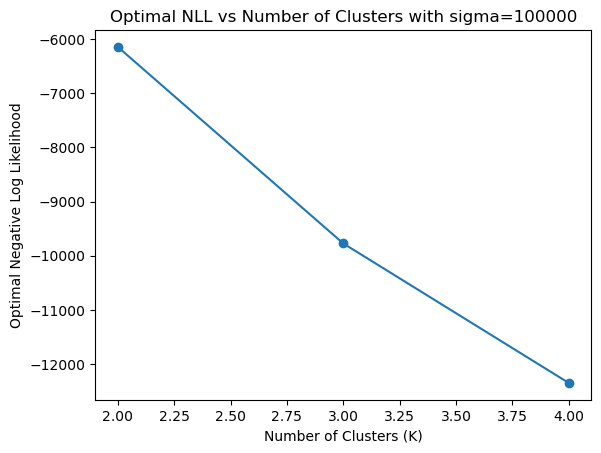

[1564.47482768 1564.47482768] [0.87727073 0.87727073]


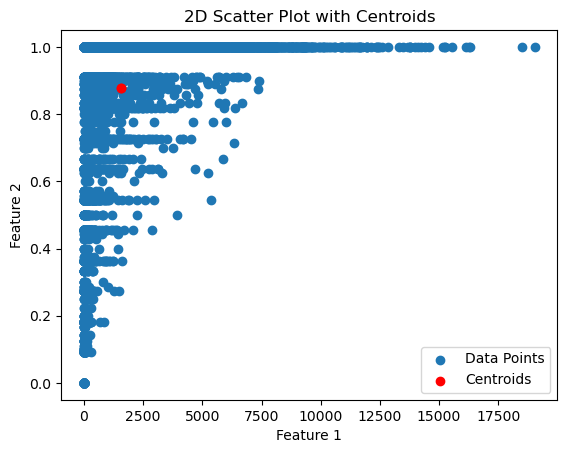

[1564.47482768 1564.47482768 1564.47482768] [0.87727073 0.87727073 0.87727073]


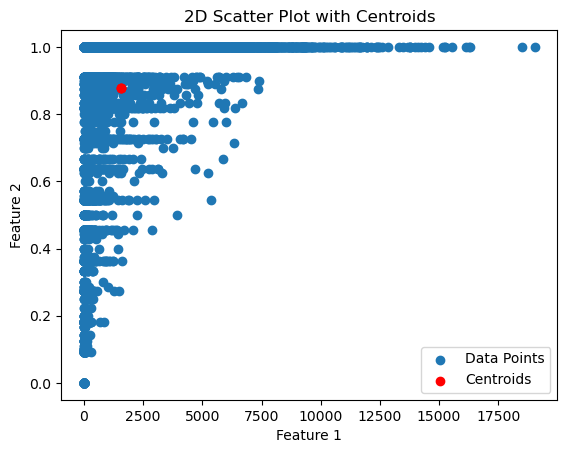

[1564.47482768 1564.47482768 1564.47482768 1564.47482768] [0.87727073 0.87727073 0.87727073 0.87727073]


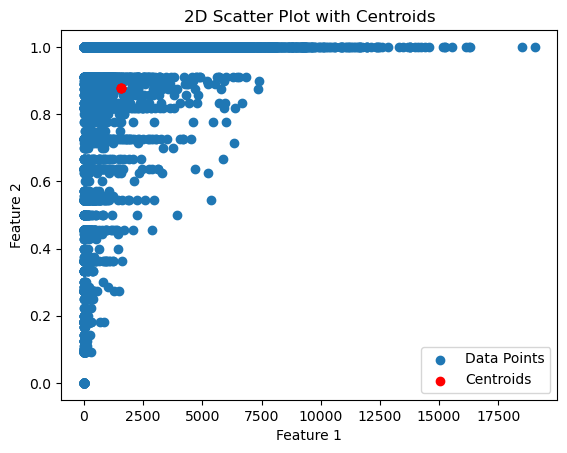

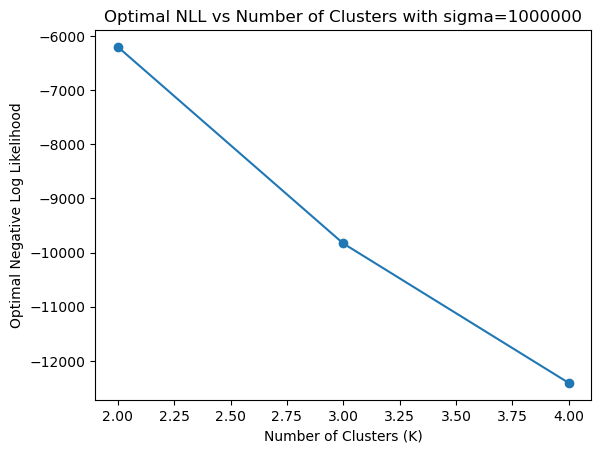

In [8]:
def EM_clustering(X,sigma,K):
    # Number of iterations
    iter_num=10
    # d is the number of features and n is the number of the data points:
    (n,d)=X.shape
    # Initialize the K centroids randomly. Each row is a centroid.
    M=np.random.randn(K,d)
    # A vector that stores the NLL value in different iterations:
    value=np.zeros(iter_num)
    omega=np.zeros((n, K))

    #start the EM loop:
    for i in range(iter_num):
        # Apply the E stape by calculating the omega_{i,k} coefficients
        temp=np.zeros((n, K))
        for k in range(K):
            temp[:, k] = np.exp(-((np.sum((X-M[k]), axis=1))**2)/(2 * sigma**2))
        omega = temp / np.sum(temp, axis=1, keepdims=True)
        # Apply the M step and obtain an update of M
        nmm = np.dot(np.transpose(omega), X)
        dnm = np.sum(omega, axis=0)
        for c in range(d):
            M[:, c] = nmm[:, c] / dnm
        # M = np.transpose(np.transpose(np.dot(np.transpose(omega), X)) / np.sum(omega, axis=0))
        # Calculate the NLL vale
        for k in range(K):
            temp[:, k] = np.exp(-((np.sum((X-M[k]), axis=1))**2)/(2 * sigma**2))
        value[i]= -np.sum(np.log(np.sum(temp, axis=1, keepdims=True)))

    return M, value


#Load the CC General dataset by pandas and keep the numerical part as a
df = pd.read_csv('CC GENERAL.csv')
# numpy array X
X = df.select_dtypes(include=[np.number]).fillna(0).to_numpy()
# Apply EM_clustering(X,sigma,K)
#sigma=np.std(X, axis=0)
sigmas = [10000, 100000, 1000000]
K_values = [2, 3, 4]
# Plot value vs iterations
# Apply different numbers of clusters and plot the last
# value of NLL (i.e. value[-1]) as the optimal NLL vs the number of clusters
for s in sigmas:
    optimal_nll_values = []
    for K in K_values:
        M, value = EM_clustering(X, s, K)
        optimal_nll_values.append(value[-1])
        print(M[:, 0], M[:, 1])
        plt.scatter(X[:, 0], X[:, 1], label='Data Points')
        plt.scatter(M[:, 0], M[:, 1], marker='o', color='red', label='Centroids')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('2D Scatter Plot with Centroids')
        plt.legend()
        plt.show()
    # Plot optimal NLL vs number of clusters
    plt.plot(K_values, optimal_nll_values, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Optimal Negative Log Likelihood')
    plt.title('Optimal NLL vs Number of Clusters with sigma=' + str(s))
    plt.show()
    
    
